In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

from collections import Counter

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'D:\cs\project ai2\diabetes.csv')

In [3]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].median())



In [10]:
print(data[cols_with_zero].head(20))

    Glucose  BloodPressure  SkinThickness  Insulin   BMI
0     148.0           72.0           35.0    125.0  33.6
1      85.0           66.0           29.0    125.0  26.6
2     183.0           64.0           29.0    125.0  23.3
3      89.0           66.0           23.0     94.0  28.1
4     137.0           40.0           35.0    168.0  43.1
5     116.0           74.0           29.0    125.0  25.6
6      78.0           50.0           32.0     88.0  31.0
7     115.0           72.0           29.0    125.0  35.3
8     197.0           70.0           45.0    543.0  30.5
9     125.0           96.0           29.0    125.0  32.3
10    110.0           92.0           29.0    125.0  37.6
11    168.0           74.0           29.0    125.0  38.0
12    139.0           80.0           29.0    125.0  27.1
13    189.0           60.0           23.0    846.0  30.1
14    166.0           72.0           19.0    175.0  25.8
15    100.0           72.0           29.0    125.0  30.0
16    118.0           84.0     

In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Axes: >

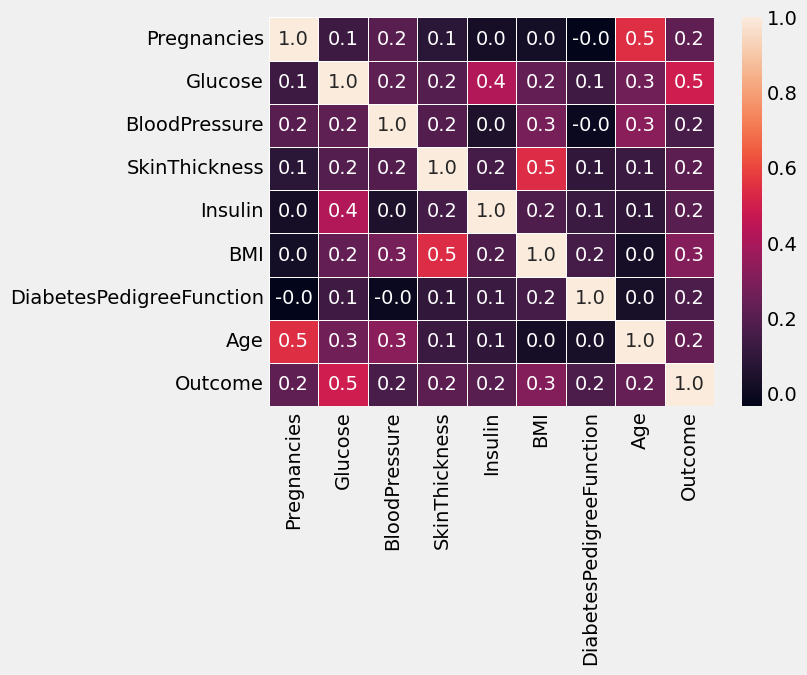

In [12]:
sns.heatmap(data.corr(),annot=True,linewidth=.5,fmt='0.1f')

<Axes: xlabel='Outcome', ylabel='count'>

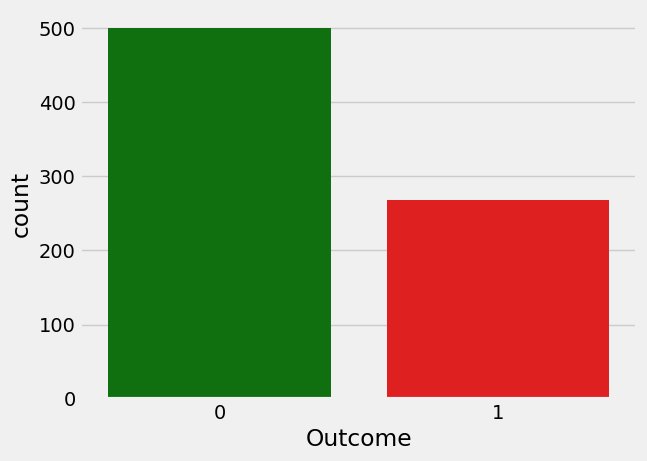

In [13]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])


<Axes: xlabel='Glucose'>

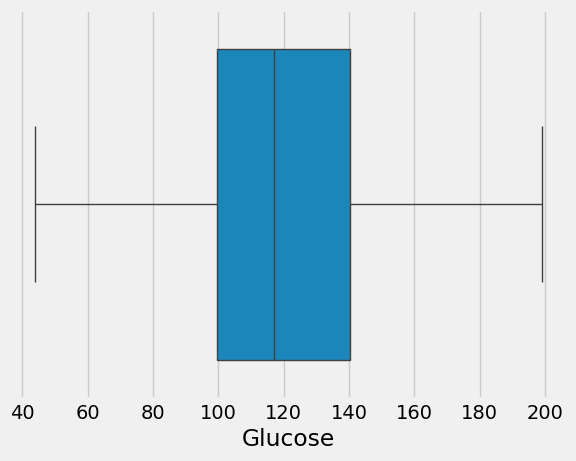

In [14]:
sns.boxplot(x='Glucose',data=data)

<Axes: xlabel='BloodPressure'>

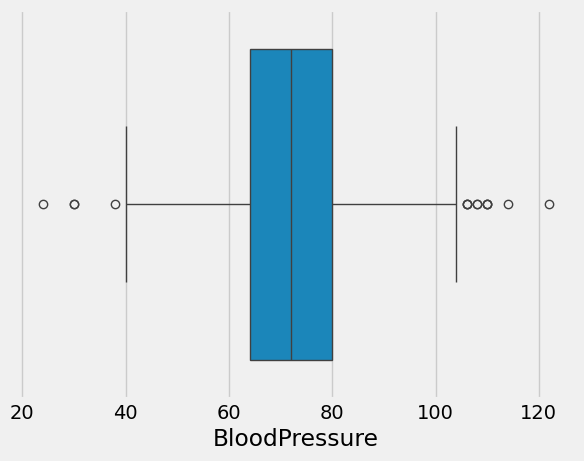

In [15]:
sns.boxplot(x='BloodPressure',data=data) 

<Axes: xlabel='Age'>

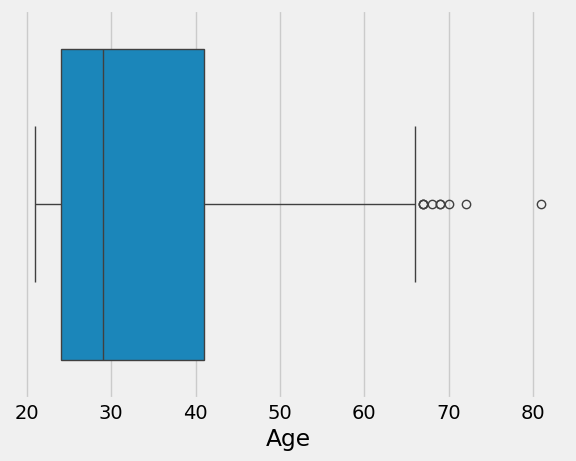

In [16]:
sns.boxplot(x='Age',data=data)

<Axes: xlabel='SkinThickness'>

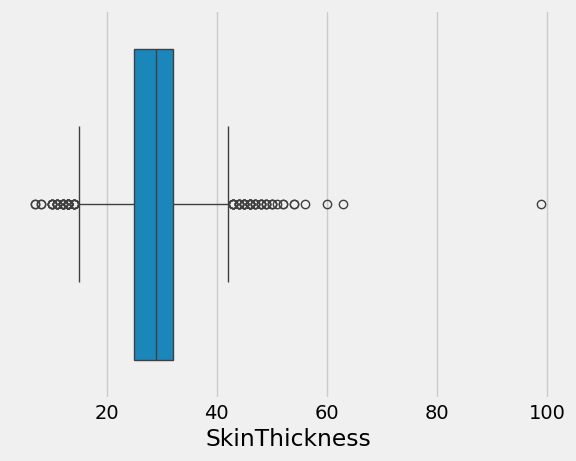

In [17]:
sns.boxplot(x='SkinThickness',data=data)

<Axes: xlabel='Insulin'>

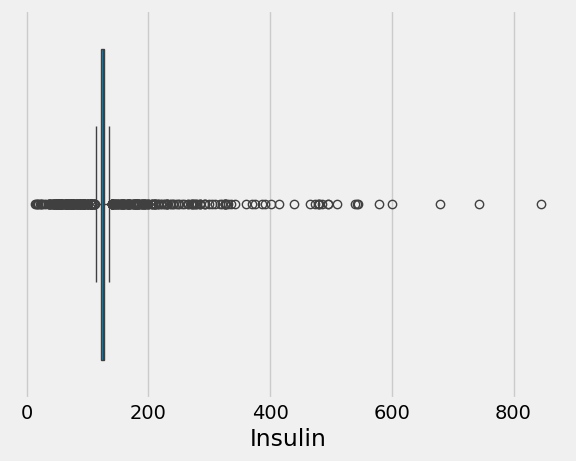

In [18]:
sns.boxplot(x='Insulin',data=data)

<Axes: xlabel='BMI'>

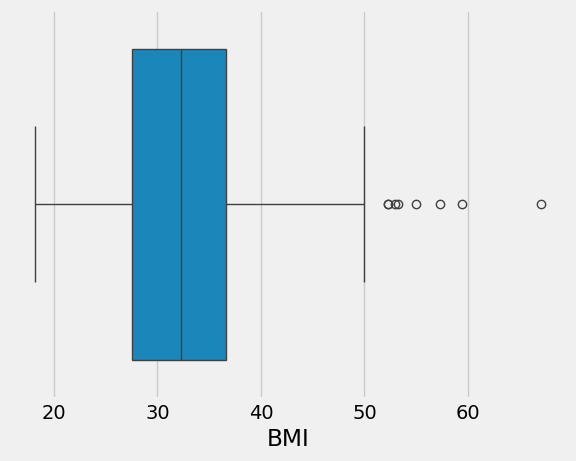

In [19]:
sns.boxplot(x='BMI',data=data)

In [20]:
#Outliers

In [21]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

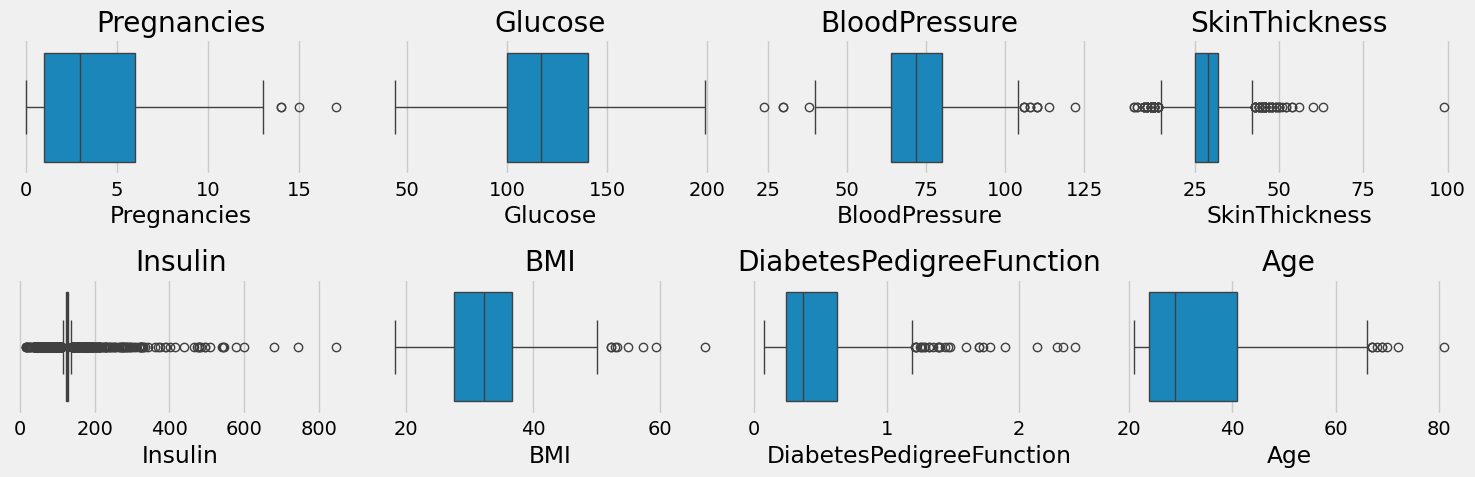

In [22]:
plt.figure(figsize=(15,5))
for i, c in enumerate(cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=data[c])
    plt.title(c)
    
plt.tight_layout()    
plt.show()


In [23]:
import pandas as pd

# تحديد الأعمدة الرقمية
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# علاج الـ outliers باستخدام IQR
for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower, upper)

print("Outliers fixed successfully!")


Outliers fixed successfully!


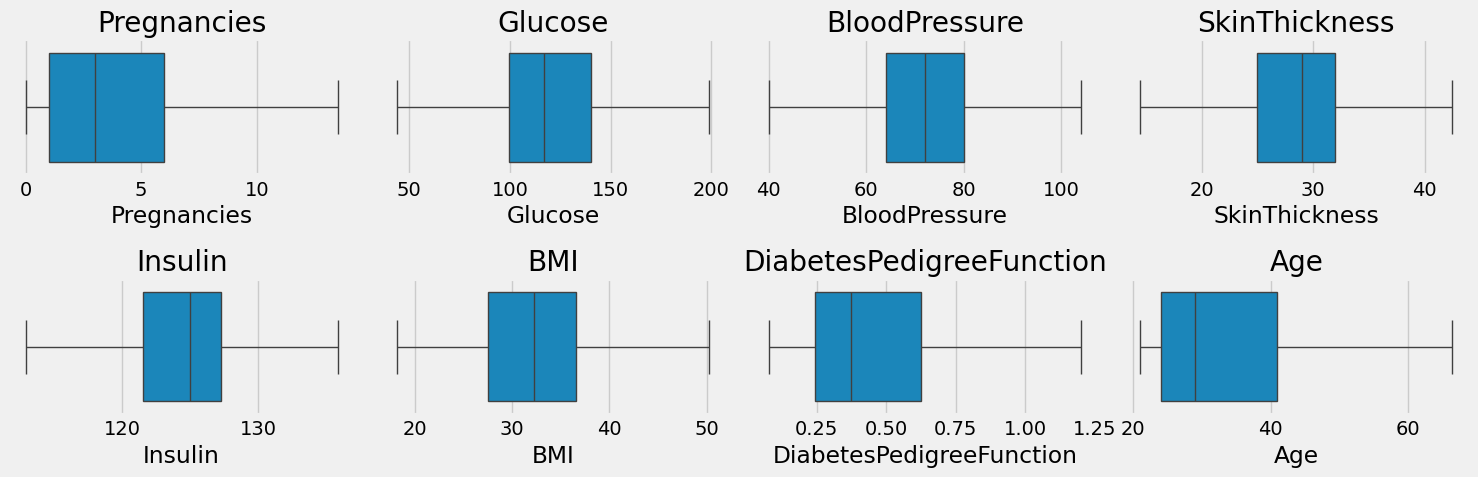

In [24]:
plt.figure(figsize=(15,5))
for i, c in enumerate(cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=data[c])
    plt.title(c)
    
plt.tight_layout()    
plt.show()


In [25]:
#MODEL

In [26]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [30]:
accuracy_score(y_pred,y_test)

0.7467532467532467

In [31]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



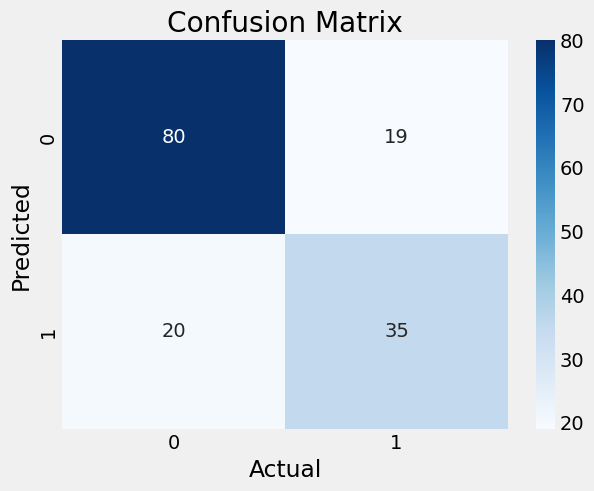

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

In [ ]:
#test

In [33]:
sample = [[
    2,      # Pregnancies
    120,    # Glucose
    70,     # BloodPressure
    20,     # SkinThickness
    79,     # Insulin
    25.5,   # BMI
    0.351,  # DiabetesPedigreeFunction
    30      # Age
]]


sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)

if prediction[0] == 1:
    print("The model predicts: DIABETES POSITIVE")
else:
    print("The model predicts: DIABETES NEGATIVE")


The model predicts: DIABETES NEGATIVE
